In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


# Stock Prediction using Machine Learning Models
Stock price prediction has long been a subject of interest for researchers, financial analysts, and investors. The dynamic and volatile nature of the stock market makes accurate predictions both challenging and rewarding. Traditional statistical methods often fall short in capturing the complex, nonlinear relationships and dependencies within financial data. This is where machine learning (ML) and deep learning (DL) techniques come into play.


## Machine Learning and Stock Prediction
Machine learning is a subset of artificial intelligence (AI) that enables computers to learn patterns from data and make predictions without being explicitly programmed. In the context of stock market prediction, ML models aim to forecast future stock prices by analyzing historical data, trends, and indicators.

Advantages:


*   Ability to process large volumes of data.
*   Flexibility to learn intricate patterns.
*   Adaptability to changes in market behavior.




While traditional ML models, such as linear regression and decision trees, are effective for basic forecasting tasks, the highly dynamic and noisy nature of stock market data necessitates more sophisticated approaches. Deep learning, a subfield of ML, provides advanced techniques that excel at identifying complex patterns and relationships.



# Statistical tests


Statistical Tests for 'Close':

ADF Test:
  ADF Statistic: 2.0711
  p-value: 0.9988
  Critical Values:
    1%: -3.4315
    5%: -2.8620
    10%: -2.5670
  Non-stationary

Shapiro-Wilk Test (Normality):
  Test Statistic: 0.7097
  p-value: 0.0000
  Data is not normal

Jarque-Bera Test (Normality):
  Test Statistic: 3220.3681
  p-value: 0.0000
  Data is not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5785.
  res = hypotest_fun_out(*samples, **kwds)


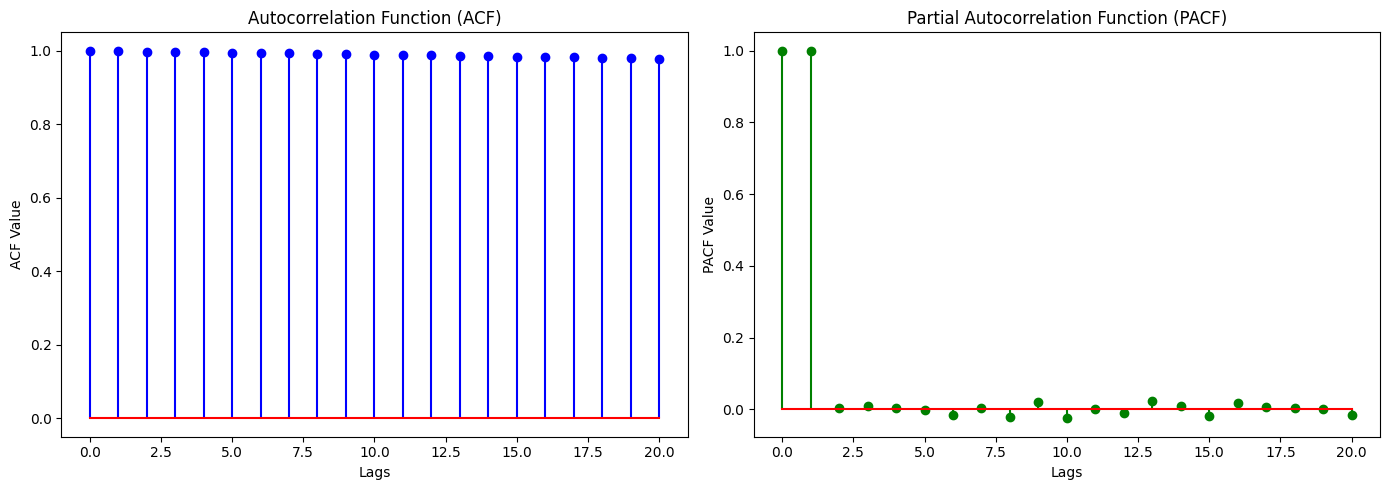

In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import shapiro, jarque_bera
import matplotlib.pyplot as plt

def check_time_series_statistics(time_series, column_name):
    print(f"\nStatistical Tests for '{column_name}':\n")

    # 1. Augmented Dickey-Fuller (ADF) Test for Stationarity
    adf_test = adfuller(time_series[column_name].dropna())
    print("ADF Test:")
    print(f"  ADF Statistic: {adf_test[0]:.4f}")
    print(f"  p-value: {adf_test[1]:.4f}")
    print("  Critical Values:")
    for key, value in adf_test[4].items():
        print(f"    {key}: {value:.4f}")
    print("  Stationary" if adf_test[1] < 0.05 else "  Non-stationary")

    # 2. Shapiro-Wilk Test for Normality
    shapiro_test = shapiro(time_series[column_name].dropna())
    print("\nShapiro-Wilk Test (Normality):")
    print(f"  Test Statistic: {shapiro_test[0]:.4f}")
    print(f"  p-value: {shapiro_test[1]:.4f}")
    print("  Data is normal" if shapiro_test[1] > 0.05 else "  Data is not normal")

    # 3. Jarque-Bera Test for Normality
    jb_test = jarque_bera(time_series[column_name].dropna())
    print("\nJarque-Bera Test (Normality):")
    print(f"  Test Statistic: {jb_test[0]:.4f}")
    print(f"  p-value: {jb_test[1]:.4f}")
    print("  Data is normal" if jb_test[1] > 0.05 else "  Data is not normal")

    # 4. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
    acf_values = acf(time_series[column_name].dropna(), nlags=20)
    pacf_values = pacf(time_series[column_name].dropna(), nlags=20)

    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].stem(range(len(acf_values)), acf_values, linefmt='b-', markerfmt='bo', basefmt='r-')
    axes[0].set_title("Autocorrelation Function (ACF)")
    axes[0].set_xlabel("Lags")
    axes[0].set_ylabel("ACF Value")

    axes[1].stem(range(len(pacf_values)), pacf_values, linefmt='g-', markerfmt='go', basefmt='r-')
    axes[1].set_title("Partial Autocorrelation Function (PACF)")
    axes[1].set_xlabel("Lags")
    axes[1].set_ylabel("PACF Value")

    plt.tight_layout()
    plt.show()

# Example usage
check_time_series_statistics(apple_df, 'Close')


Interpretation of the ACF and PACF Plots

Autocorrelation Function (ACF)

Observation: The ACF plot shows a very high correlation at all lags, with no decay.

Interpretation:
This is a strong indicator of non-stationarity. A stationary time series should exhibit a rapid decay in ACF values as the lag increases.

The constant high autocorrelation at all lags suggests that the series likely has a strong trend component or unit root.


Partial Autocorrelation Function (PACF)

Observation:

The PACF shows a significant spike at lag 1, followed by a sharp drop, with the remaining values near zero.

Interpretation:
This suggests that most of the correlation in the series can be explained by the first lag.

After removing the effects of intermediate lags, the influence of additional lags is minimal.

This behavior is consistent with a possible AR(1) process or a series with a strong autoregressive component.

Overall Analysis

Stationarity: The series is non-stationary, as indicated by the high ACF values across all lags.


The PACF suggests that an autoregressive (AR) term with lag 1 might be suitable after making the series stationary.


## Hybrid Deep Learning Models for Stock Prediction
Deep learning models, such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks, are designed to capture sequential dependencies in time-series data. However, combining multiple architectures in a hybrid framework can further enhance the prediction accuracy by leveraging the strengths of each component.


# LSTM
This implementation uses an LSTM-based deep learning model to predict Apple stock prices over specific test periods. LSTMs are a type of recurrent neural network (RNN) well-suited for sequential and time-series data due to their ability to capture long-term dependencies while mitigating issues like vanishing gradients.

##  Key Features of the Model
Data Preparation:

Historical stock prices (closing prices) were preprocessed, including the calculation of moving averages (25-day and 100-day) to introduce additional features.
Data normalization was performed using a MinMaxScaler to scale values between 0 and 1 for better convergence during training.
Sequences of 30 days were created as input for the model to predict the stock price for the next day.

Model Architecture:

The model contains two stacked LSTM layers to capture both short-term and long-term sequential patterns in the stock data.
Dropout layers were added after each LSTM layer to reduce overfitting by randomly dropping a fraction of neurons during training.
A final Dense layer outputs a single value corresponding to the predicted closing price.

Hyperparameter Tuning:

The number of units (neurons) in each LSTM layer, dropout rates, and the learning rate were optimized using Keras Tuner's RandomSearch.
Multiple trials were performed to identify the best hyperparameter configuration, ensuring that the model generalizes well to unseen data.

Evaluation:

The model was trained and evaluated on three distinct train-test splits, representing different years in the stock market.
Performance was assessed using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²).
Predictions were visualized alongside actual prices, as well as moving averages, to evaluate model accuracy and trends.

[*********************100%***********************]  1 of 1 completed
<ipython-input-5-dd6549efbd11>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data['MA25'] = close_data['Close'].rolling(window=25).mean()
<ipython-input-5-dd6549efbd11>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data['MA100'] = close_data['Close'].rolling(window=100).mean()
<ipython-input-5-dd6549efbd11>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row


Training on 2001-01-01 to 2019-12-31, testing on 2020-01-01 to 2020-12-31
Reloading Tuner from kt_lstm_tuning/period_2020-01-01_2020-12-31/tuner0.json


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x79ad7fa3b6d0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Best Hyperparameters Found:
Units_1: 112, Units_2: 128, Dropout_1: 0.1, Dropout_2: 0.4, Learning Rate: 0.001
Epoch 1/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - loss: 3.4659e-05 - val_loss: 2.5342e-04
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 2.7544e-05 - val_loss: 2.1349e-04
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - loss: 3.0765e-05 - val_loss: 5.2462e-05
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 3.3025e-05 - val_loss: 4.1737e-05
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 3.4236e-05 - val_loss: 3.5438e-05
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 2.6538e-05 - val_loss: 3.0143e-05
Epoch 7/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 2.7531e-05 - val_loss: 6.3992e-04
Epoch 8/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - loss: 3.3266e-05 - val_loss: 5.1314e-05
Epoch 9/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 2.3720e-05 - val_loss: 3.4531e-05
Epoch 10/50
238/238 ━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Results for 2020-01-01 to 2020-12-31: MSE=32.9718, MAE=4.6962, R2=0.9333

Training on 2001-01-01 to 2020-12-31, testing on 2021-01-01 to 2021-12-31
Reloading Tuner from kt_lstm_tuning/period_2021-01-01_2021-12-31/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Best Hyperparameters Found:
Units_1: 128, Units_2: 64, Dropout_1: 0.1, Dropout_2: 0.2, Learning Rate: 0.01
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - loss: 4.1663e-04 - val_loss: 0.0046
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 3.4272e-05 - val_loss: 0.0032
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 2.8728e-05 - val_loss: 0.0016
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 4.4440e-05 - val_loss: 0.0033
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 5.0037e-05 - val_loss: 0.0016
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - loss: 3.4517e-05 - val_loss: 0.0016
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 4.4199e-05 - val_loss: 0.0036
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 3.1326e-05 - val_loss: 0.0038
Epoch 9/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 2.8997e-05 - val_loss: 0.0044
Epoch 10/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 2.9097e-05 - val_loss: 8.5678e-04
Epoch 11/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - loss: 2.3438e-05 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Best Hyperparameters Found:
Units_1: 80, Units_2: 48, Dropout_1: 0.1, Dropout_2: 0.1, Learning Rate: 0.01
Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 1.6618e-04 - val_loss: 0.0041
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 3.2805e-05 - val_loss: 0.0010
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 3.9687e-05 - val_loss: 0.0027
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 4.9931e-05 - val_loss: 0.0040
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 3.4494e-05 - val_loss: 0.0073
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 2.8538e-05 - val_loss: 0.0075
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 2.2874e-05 - val_loss: 0.0074
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 2.4802e-05 - val_loss: 0.0062
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 2.6656e-05 - val_loss: 0.0052
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 2.61

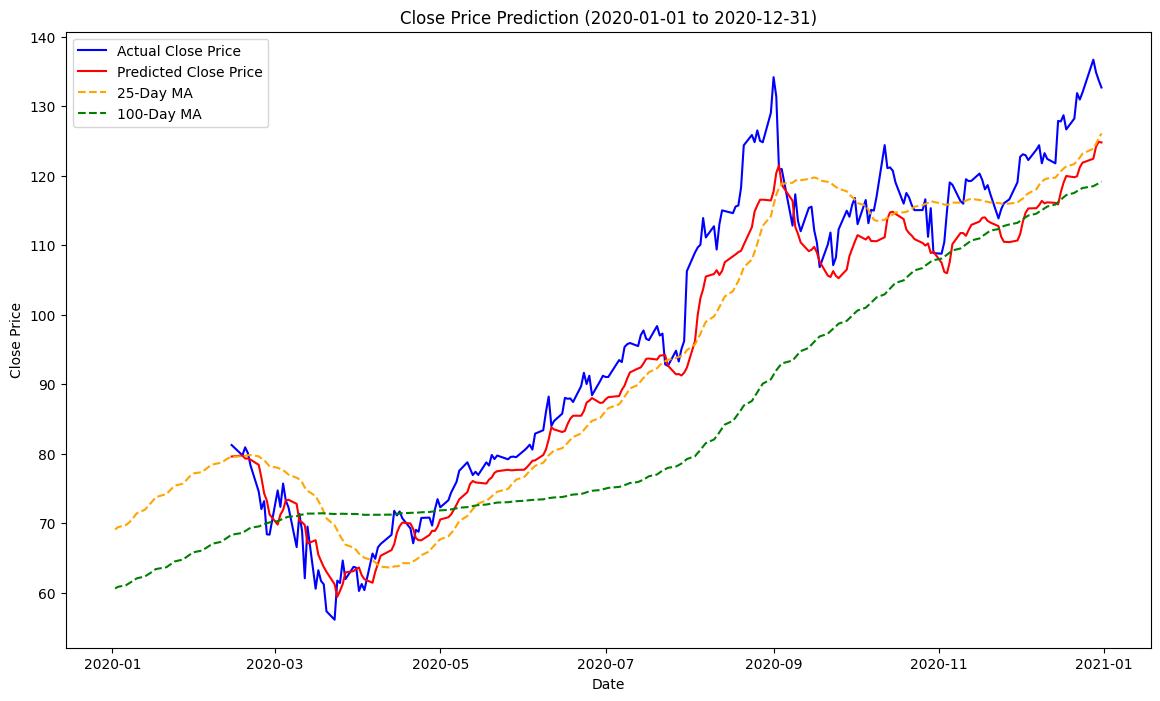

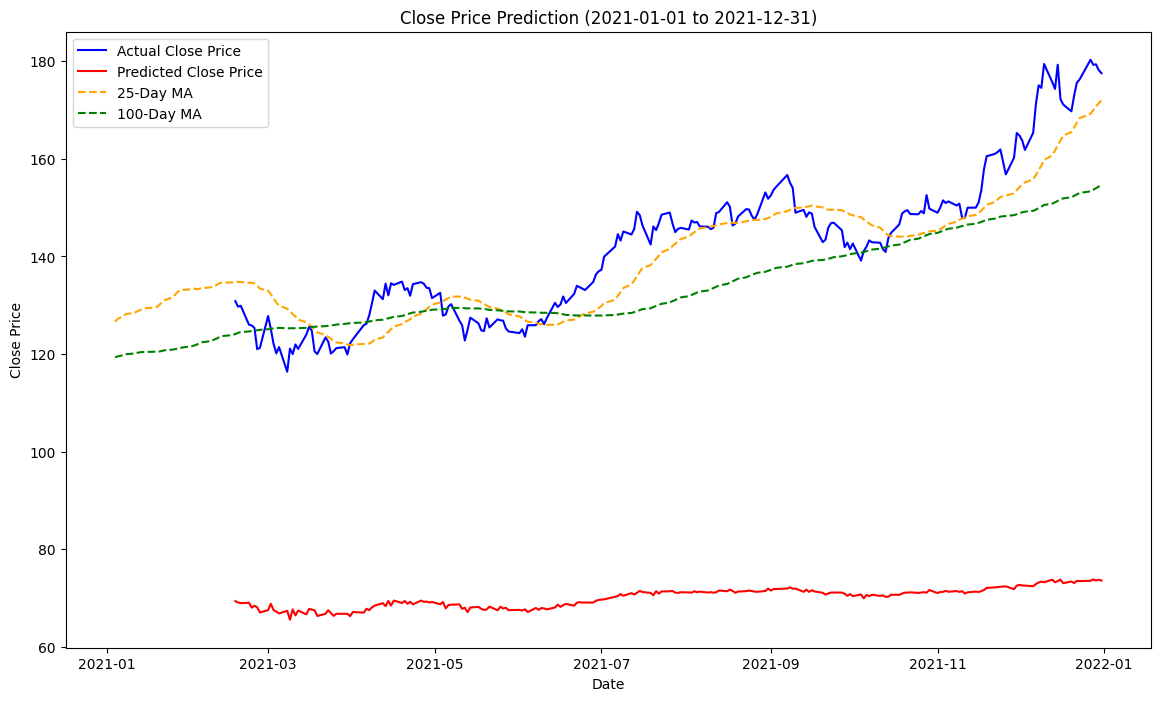

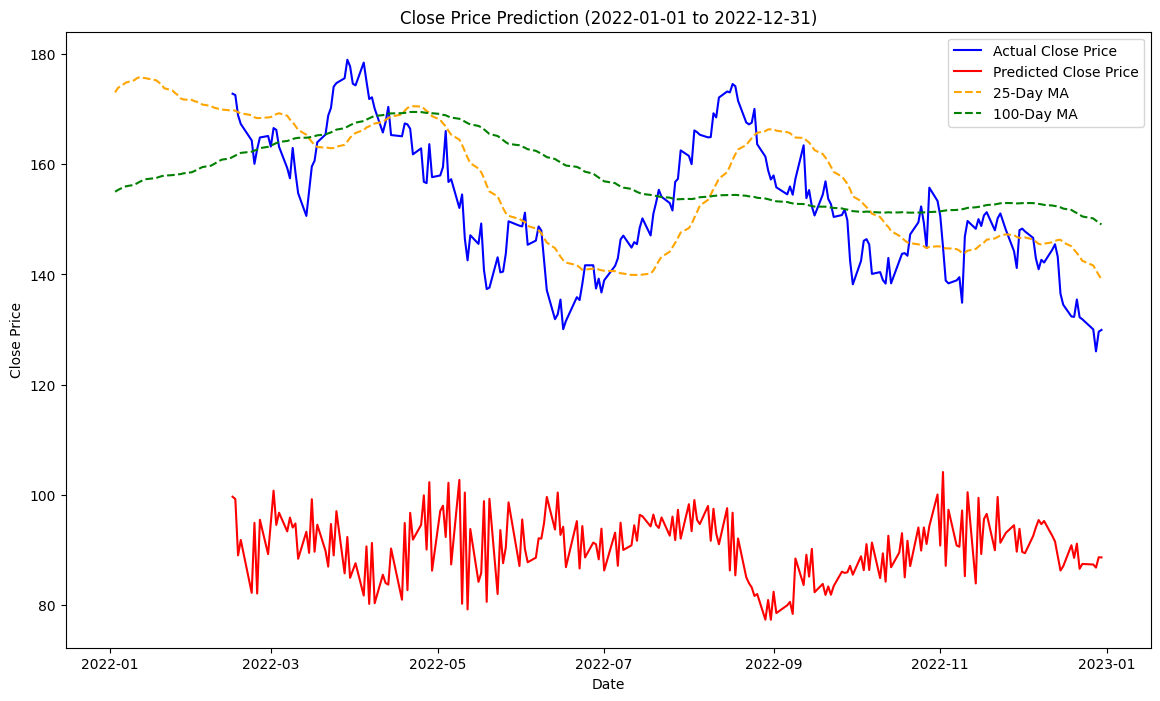

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

# Download Apple stock data
apple_df = yf.download('AAPL', start='2001-01-01', end='2024-01-01', interval='1d')

# Reset index and preprocess
apple_df.reset_index(inplace=True)
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace=True)
apple_df.sort_index(inplace=True)

# Focus on the 'Close' column and calculate moving averages
close_data = apple_df[['Close']]
close_data['MA25'] = close_data['Close'].rolling(window=25).mean()
close_data['MA100'] = close_data['Close'].rolling(window=100).mean()

# Normalize the data (Close, MA25, MA100)
scaler = MinMaxScaler()
close_data[['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']] = scaler.fit_transform(
    close_data[['Close', 'MA25', 'MA100']].fillna(0)  # Fill NaN with 0 for scaling
)

# Create sequences for LSTM
def create_sequence(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i - window_size:i].values)  # Input sequence with all features
        y.append(data.iloc[i, 0])  # Target: 'Close_Scaled' (first column)
    return np.array(X), np.array(y)

window_size = 30

# Define test periods
test_periods = [
    ("2001-01-01", "2019-12-31", "2020-01-01", "2020-12-31"),
    ("2001-01-01", "2020-12-31", "2021-01-01", "2021-12-31"),
    ("2001-01-01", "2021-12-31", "2022-01-01", "2022-12-31")
]

# Function to build a model with hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(window_size, 3)
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(keras.layers.LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),
        return_sequences=False
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(keras.layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

results = []
figures = []  # List to store figures for each test period

# Train and evaluate model with hyperparameter tuning for each period
for train_start, train_end, test_start, test_end in test_periods:
    print(f"\nTraining on {train_start} to {train_end}, testing on {test_start} to {test_end}")

    # Split data into train and test sets
    train_data = close_data.loc[train_start:train_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]
    test_data = close_data.loc[test_start:test_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]

    # Create sequences
    X_train, y_train = create_sequence(train_data, window_size)
    X_test, y_test = create_sequence(test_data, window_size)

    # Set up the Keras Tuner
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='kt_lstm_tuning',
        project_name=f'period_{test_start}_{test_end}'
    )

    # Perform the hyperparameter search
    tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=16, verbose=1)

    # Retrieve the best hyperparameters and model
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("\nBest Hyperparameters Found:")
    print(f"Units_1: {best_hp.get('units_1')}, Units_2: {best_hp.get('units_2')}, "
          f"Dropout_1: {best_hp.get('dropout_1')}, Dropout_2: {best_hp.get('dropout_2')}, "
          f"Learning Rate: {best_hp.get('learning_rate')}")

    # Train the best model
    best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

    # Make predictions
    predictions = best_model.predict(X_test)

    # Inverse transform predictions and test data
    predictions_rescaled = scaler.inverse_transform(
        np.concatenate((predictions, np.zeros((len(predictions), 2))), axis=1)
    )[:, 0]  # Keep only the 'Close' column
    y_test_rescaled = scaler.inverse_transform(
        np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 2))), axis=1)
    )[:, 0]  # Keep only the 'Close' column

    # Evaluate the model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
    r2 = r2_score(y_test_rescaled, predictions_rescaled)
    print(f"Results for {test_start} to {test_end}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

    # Store results
    results.append({
        "Train Period": f"{train_start} to {train_end}",
        "Test Period": f"{test_start} to {test_end}",
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

    # Generate the plot and store the figure
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], y_test_rescaled, label="Actual Close Price", color="blue")
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], predictions_rescaled, label="Predicted Close Price", color="red")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA25'], label="25-Day MA", color="orange", linestyle="--")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA100'], label="100-Day MA", color="green", linestyle="--")
    ax.set_title(f"Close Price Prediction ({test_start} to {test_end})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    ax.legend()
    figures.append(fig)

# Display all saved plots
for i, fig in enumerate(figures):
    print(f"\nDisplaying plot {i+1} of {len(figures)}")
    fig.show()

# Display overall results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


## Summary
This LSTM model demonstrates the power of recurrent neural networks for stock price prediction by leveraging sequential dependencies in the data. The integration of hyperparameter tuning ensures a robust and optimized architecture. By incorporating additional features like moving averages, the model can also account for broader market trends, improving its prediction capabilities.

#LSTM - CNN
This implementation combines Convolutional Neural Networks (CNNs) and Long Short-Term Memory (LSTM) networks to predict Apple stock prices. This hybrid model leverages the strengths of CNNs for feature extraction and LSTMs for sequential modeling, making it ideal for capturing both local patterns and long-term dependencies in time-series data.

##Key Features of the Model
Data Preparation:

Historical stock prices (closing prices) were preprocessed with additional moving averages (25-day and 100-day) as features.
The data was normalized using a MinMaxScaler for consistent training performance.
Input sequences of 30 days were created, providing the model with a sliding window of past data to predict the next day’s stock price.

Hybrid Model Architecture:

A Conv1D layer was used to extract local temporal patterns from the input data.
A MaxPooling layer reduced the dimensionality while retaining important features.
Two stacked LSTM layers captured the sequential dependencies in the time series.
Dropout layers reduced overfitting, and a final Dense layer output the predicted stock price.

Hyperparameter Tuning:

The model’s architecture and parameters, including the number of filters, kernel size, LSTM units, dropout rates, and learning rate, were optimized using Keras Tuner's RandomSearch.
A systematic search was conducted to ensure the best combination of hyperparameters for accurate predictions.

Evaluation:

The model was trained and evaluated on three distinct train-test periods, covering different years to test its robustness.
Metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) were used to assess performance.
Predictions were visualized alongside actual prices and moving averages to evaluate trends and accuracy.

Trial 10 Complete [00h 02m 41s]
val_loss: 0.001143291825428605

Best val_loss So Far: 0.0007558081997558475
Total elapsed time: 00h 27m 59s

Best Hyperparameters Found:
Filters: 64, Kernel Size: 2, Units_1: 128, Units_2: 48, Dropout_1: 0.1, Dropout_2: 0.2, Learning Rate: 0.0001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 4.1199e-05 - val_loss: 8.1211e-04
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 3.6722e-05 - val_loss: 0.0011
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 3.2270e-05 - val_loss: 9.4046e-04
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 3.3887e-05 - val_loss: 0.0021
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 3.5549e-05 - val_loss: 0.0011
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 3.6321e-05 - val_loss: 0.0010
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 3.1753e-05 - val_loss: 8.7909e-04
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 3.3091e-05 - val_loss: 8.2683e-04
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 3.1986e-05 - val_loss: 6.7997e-04
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 3.1705e-05 - val_loss: 7.7359e-04
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 3.1967e-

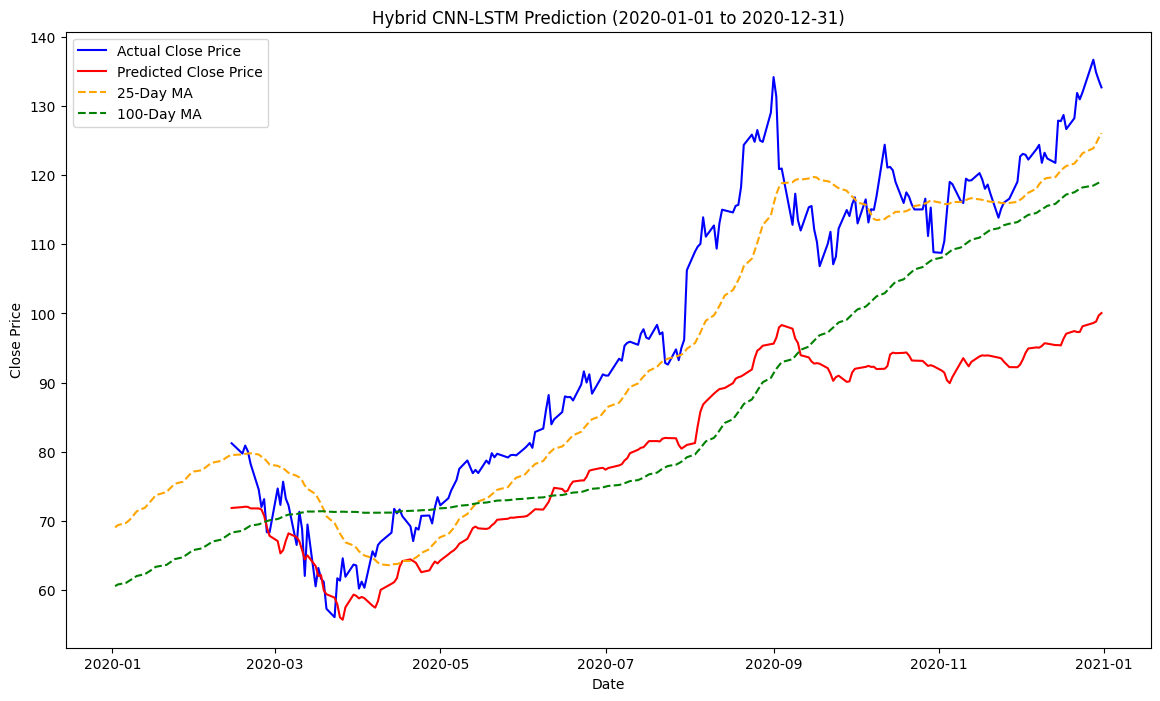

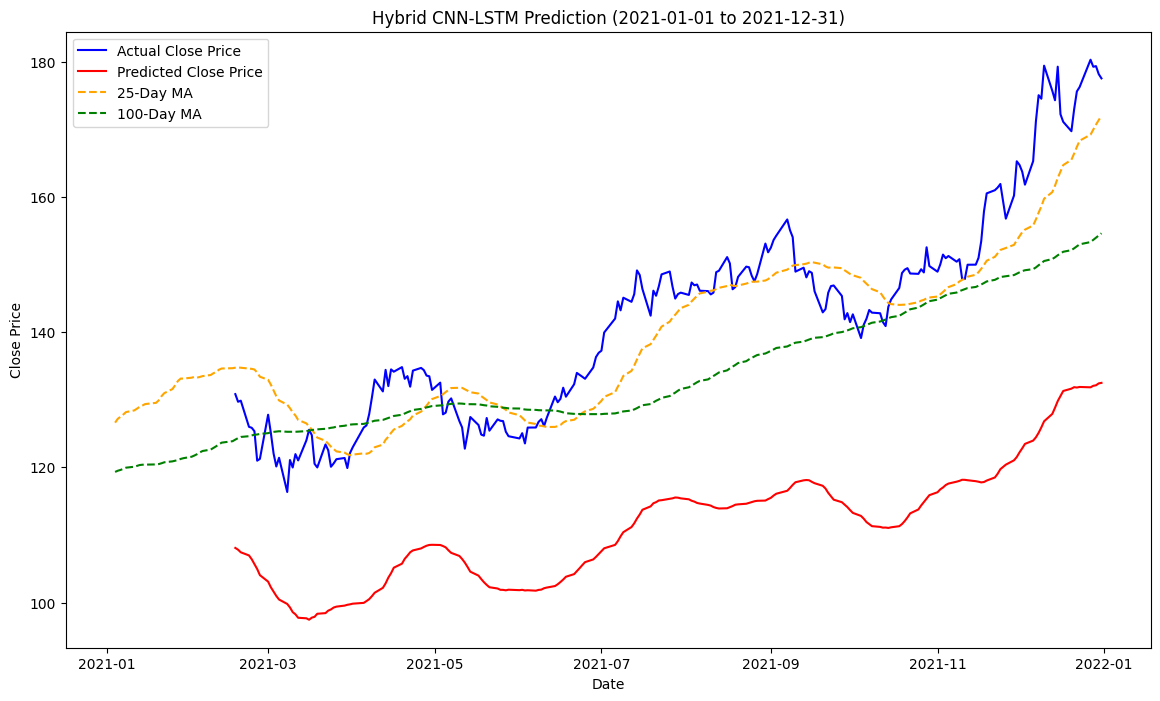

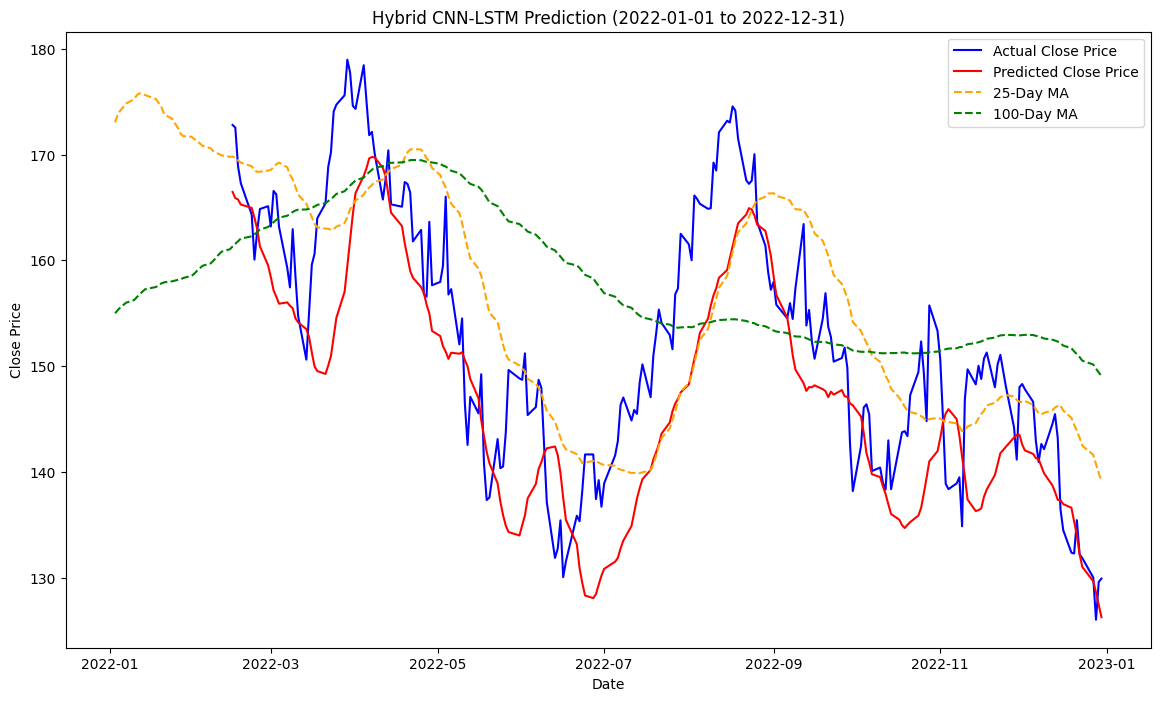

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

# Download Apple stock data
apple_df = yf.download('AAPL', start='2001-01-01', end='2024-01-01', interval='1d')

# Reset index and preprocess
apple_df.reset_index(inplace=True)
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace=True)
apple_df.sort_index(inplace=True)

# Focus on the 'Close' column and calculate moving averages
close_data = apple_df[['Close']]
close_data['MA25'] = close_data['Close'].rolling(window=25).mean()
close_data['MA100'] = close_data['Close'].rolling(window=100).mean()

# Normalize the data (Close, MA25, MA100)
scaler = MinMaxScaler()
close_data[['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']] = scaler.fit_transform(
    close_data[['Close', 'MA25', 'MA100']].fillna(0)
)

# Create sequences for LSTM
def create_sequence(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i - window_size:i].values)
        y.append(data.iloc[i, 0])
    return np.array(X), np.array(y)

window_size = 30

# Define test periods
test_periods = [
    ("2001-01-01", "2019-12-31", "2020-01-01", "2020-12-31"),
    ("2001-01-01", "2020-12-31", "2021-01-01", "2021-12-31"),
    ("2001-01-01", "2021-12-31", "2022-01-01", "2022-12-31")
]

# Function to build a CNN-LSTM model with hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()

    # CNN layer for feature extraction
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=16, max_value=128, step=16),
        kernel_size=hp.Int('kernel_size', min_value=2, max_value=5),
        activation='relu',
        input_shape=(window_size, 3)
    ))
    model.add(keras.layers.MaxPooling1D(pool_size=2))

    # LSTM layers for sequential modeling
    model.add(keras.layers.LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),
        return_sequences=True
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(keras.layers.LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),
        return_sequences=False
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense output layer
    model.add(keras.layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

results = []
figures = []

# Train and evaluate the hybrid CNN-LSTM model
for train_start, train_end, test_start, test_end in test_periods:
    print(f"\nTraining on {train_start} to {train_end}, testing on {test_start} to {test_end}")

    # Split data into train and test sets
    train_data = close_data.loc[train_start:train_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]
    test_data = close_data.loc[test_start:test_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]

    # Create sequences
    X_train, y_train = create_sequence(train_data, window_size)
    X_test, y_test = create_sequence(test_data, window_size)

    # Set up the Keras Tuner
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='cnn_lstm_tuning',
        project_name=f'period_{test_start}_{test_end}'
    )

    # Perform hyperparameter search
    tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=16, verbose=1)

    # Retrieve the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

    print("\nBest Hyperparameters Found:")
    print(f"Filters: {best_hp.get('filters')}, Kernel Size: {best_hp.get('kernel_size')}, "
          f"Units_1: {best_hp.get('units_1')}, Units_2: {best_hp.get('units_2')}, "
          f"Dropout_1: {best_hp.get('dropout_1')}, Dropout_2: {best_hp.get('dropout_2')}, "
          f"Learning Rate: {best_hp.get('learning_rate')}")

    # Train the best model
    best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

    # Make predictions
    predictions = best_model.predict(X_test)

    # Inverse transform predictions and actual values
    predictions_rescaled = scaler.inverse_transform(
        np.concatenate((predictions, np.zeros((len(predictions), 2))), axis=1)
    )[:, 0]
    y_test_rescaled = scaler.inverse_transform(
        np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 2))), axis=1)
    )[:, 0]

    # Evaluate the model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
    r2 = r2_score(y_test_rescaled, predictions_rescaled)
    print(f"Results for {test_start} to {test_end}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

    results.append({
        "Train Period": f"{train_start} to {train_end}",
        "Test Period": f"{test_start} to {test_end}",
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

    # Generate and store the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], y_test_rescaled, label="Actual Close Price", color="blue")
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], predictions_rescaled, label="Predicted Close Price", color="red")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA25'], label="25-Day MA", color="orange", linestyle="--")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA100'], label="100-Day MA", color="green", linestyle="--")
    ax.set_title(f"Hybrid CNN-LSTM Prediction ({test_start} to {test_end})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    ax.legend()
    figures.append(fig)

# Display all plots
for i, fig in enumerate(figures):
    print(f"\nDisplaying plot {i+1} of {len(figures)}")
    fig.show()

# Display summary results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


## Summary
The hybrid CNN-LSTM model demonstrates the power of combining feature extraction (via CNNs) with sequence modeling (via LSTMs) for stock price prediction. The integration of moving averages as features and hyperparameter tuning further enhances the model's capability to adapt to complex market dynamics.








# CNN - GRU
This implementation utilizes a Convolutional Neural Network (CNN) and Gated Recurrent Unit (GRU) hybrid model to predict the closing prices of Apple stock. This approach combines the feature extraction capabilities of CNNs with the sequential processing power of GRUs to model complex temporal patterns in financial time-series data effectively.

## Key Features of the Model

Data Preprocessing

Historical stock price data from Yahoo Finance was utilized, focusing on the Close price.
Moving averages (25-day and 100-day) were included as additional features to incorporate long-term trends.
Data normalization using MinMaxScaler ensured compatibility with the model's activation functions.

Model Architecture

Hybrid CNN-GRU:
Convolutional Layer: Captures short-term temporal dependencies by extracting local features.

MaxPooling Layer: Reduces dimensionality and focuses on dominant patterns.

GRU Layers: Sequential layers with varying numbers of units to model long-term dependencies in time series effectively.

Dropout Layers: Prevent overfitting by randomly deactivating neurons during training.

Dense Output Layer: Predicts the next day’s scaled closing price.

Hyperparameter Tuning

Keras Tuner’s RandomSearch was employed to optimize key hyperparameters:

CNN filters and kernel size.
GRU units in both layers.
Dropout rates for each GRU layer.
Learning rate for the Adam optimizer.
Each training period underwent 10 trials, ensuring the optimal configuration for the test period.

Evaluation Metrics

The model was evaluated on three different train-test periods (2020, 2021, 2022). Metrics used include:

Mean Squared Error (MSE): Measures the average squared error between predicted and actual values.

Mean Absolute Error (MAE): Captures the average magnitude of prediction errors.

R-squared (R²): Indicates how well the model explains the variance in actual prices.

Results Visualization

Predictions were plotted alongside actual closing prices.
Moving averages (25-day and 100-day) were overlaid to provide additional context on trends.

Trial 10 Complete [00h 02m 20s]
val_loss: 0.0018503612373024225

Best val_loss So Far: 0.0004076860786881298
Total elapsed time: 00h 26m 45s

Best Hyperparameters Found:
Filters: 32, Kernel Size: 4, Units_1: 96, Units_2: 48, Dropout_1: 0.30000000000000004, Dropout_2: 0.1, Learning Rate: 0.0001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 2.8436e-05 - val_loss: 4.3710e-04
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.6260e-05 - val_loss: 3.8629e-04
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 2.6876e-05 - val_loss: 3.9965e-04
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 2.7287e-05 - val_loss: 3.7727e-04
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 2.5531e-05 - val_loss: 4.2319e-04
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 2.7193e-05 - val_loss: 3.7288e-04
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 2.3763e-05 - val_loss: 3.7464e-04
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.6169e-05 - val_loss: 3.5956e-04
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 2.6089e-05 - val_loss: 4.3968e-04
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.5780e-05 - val_loss: 3.5958e-04
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - los

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
Results for 2022-01-01 to 2022-12-31: MSE=48.6010, MAE=5.6685, R2=0.6734

Displaying plot 1 of 3

Displaying plot 2 of 3

Displaying plot 3 of 3

Summary of Results:
               Train Period               Test Period         MSE        MAE  \
0  2001-01-01 to 2019-12-31  2020-01-01 to 2020-12-31  300.857529  15.593171   
1  2001-01-01 to 2020-12-31  2021-01-01 to 2021-12-31  121.408678  10.136557   
2  2001-01-01 to 2021-12-31  2022-01-01 to 2022-12-31   48.601017   5.668457   

         R2  
0  0.391447  
1  0.478054  
2  0.673441  


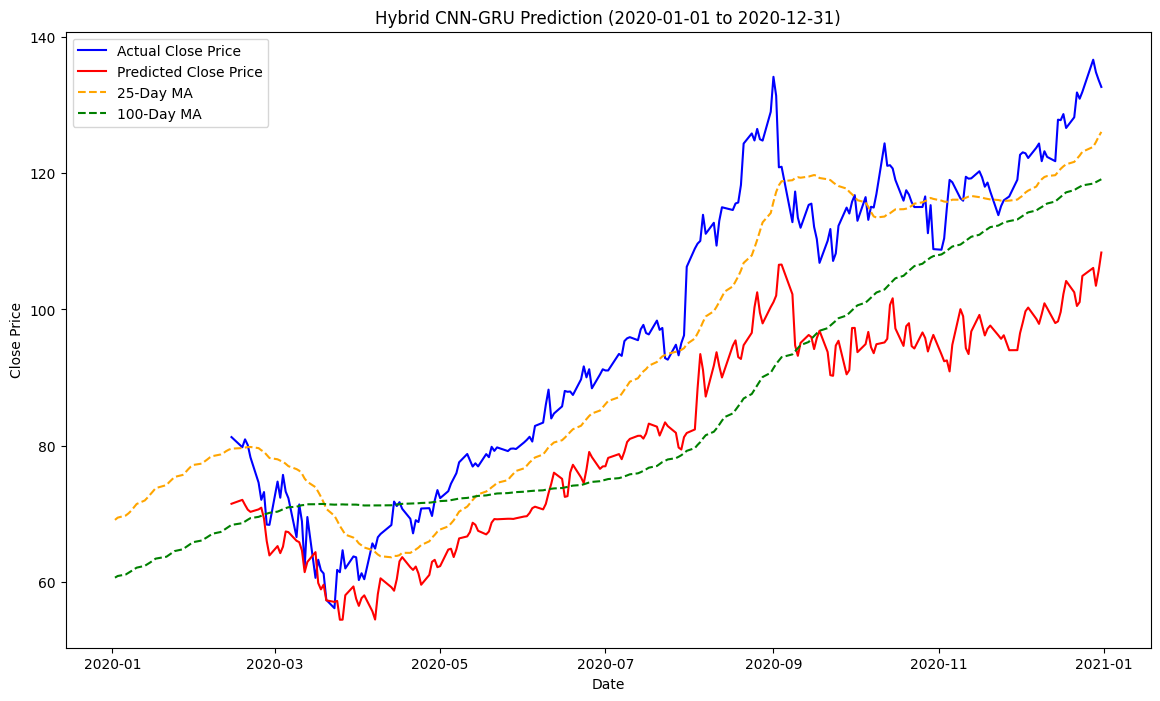

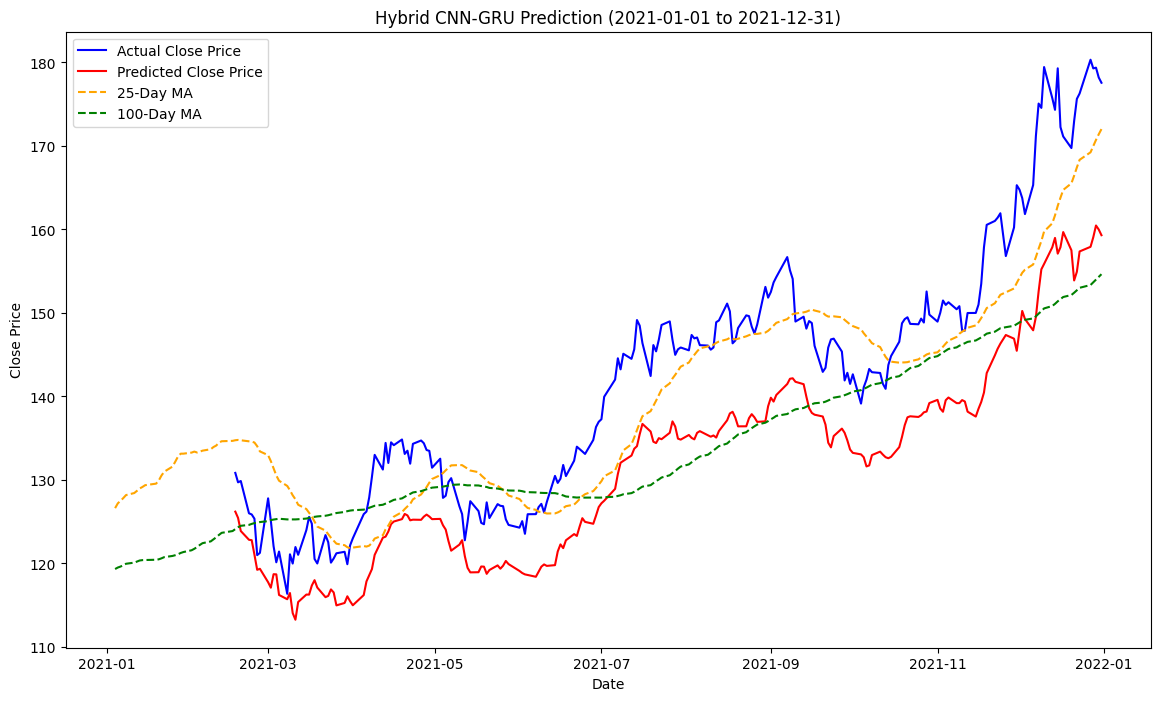

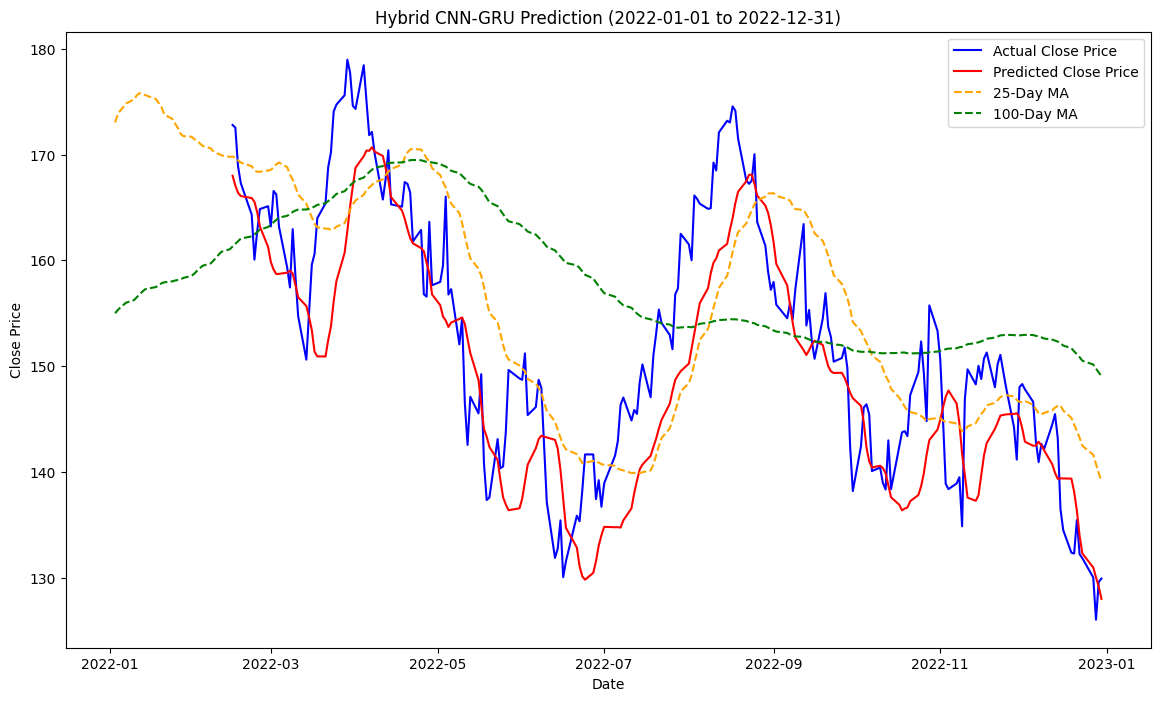

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

# Download Apple stock data
apple_df = yf.download('AAPL', start='2001-01-01', end='2024-01-01', interval='1d')

# Reset index and preprocess
apple_df.reset_index(inplace=True)
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace=True)
apple_df.sort_index(inplace=True)

# Focus on the 'Close' column and calculate moving averages
close_data = apple_df[['Close']]
close_data['MA25'] = close_data['Close'].rolling(window=25).mean()
close_data['MA100'] = close_data['Close'].rolling(window=100).mean()

# Normalize the data (Close, MA25, MA100)
scaler = MinMaxScaler()
close_data[['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']] = scaler.fit_transform(
    close_data[['Close', 'MA25', 'MA100']].fillna(0)
)

# Create sequences for GRU
def create_sequence(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i - window_size:i].values)
        y.append(data.iloc[i, 0])  # Target: 'Close_Scaled' (first column)
    return np.array(X), np.array(y)

window_size = 30

# Define test periods
test_periods = [
    ("2001-01-01", "2019-12-31", "2020-01-01", "2020-12-31"),
    ("2001-01-01", "2020-12-31", "2021-01-01", "2021-12-31"),
    ("2001-01-01", "2021-12-31", "2022-01-01", "2022-12-31")
]

# Function to build a CNN-GRU model with hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()

    # CNN layer for feature extraction
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=16, max_value=128, step=16),
        kernel_size=hp.Int('kernel_size', min_value=2, max_value=5),
        activation='relu',
        input_shape=(window_size, 3)
    ))
    model.add(keras.layers.MaxPooling1D(pool_size=2))

    # GRU layers for sequential modeling
    model.add(keras.layers.GRU(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),
        return_sequences=True
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(keras.layers.GRU(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),
        return_sequences=False
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense output layer
    model.add(keras.layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

results = []
figures = []

# Train and evaluate the hybrid CNN-GRU model
for train_start, train_end, test_start, test_end in test_periods:
    print(f"\nTraining on {train_start} to {train_end}, testing on {test_start} to {test_end}")

    # Split data into train and test sets
    train_data = close_data.loc[train_start:train_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]
    test_data = close_data.loc[test_start:test_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]

    # Create sequences
    X_train, y_train = create_sequence(train_data, window_size)
    X_test, y_test = create_sequence(test_data, window_size)

    # Set up the Keras Tuner
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='cnn_gru_tuning',
        project_name=f'period_{test_start}_{test_end}'
    )

    # Perform hyperparameter search
    tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=16, verbose=1)

    # Retrieve the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

    print("\nBest Hyperparameters Found:")
    print(f"Filters: {best_hp.get('filters')}, Kernel Size: {best_hp.get('kernel_size')}, "
          f"Units_1: {best_hp.get('units_1')}, Units_2: {best_hp.get('units_2')}, "
          f"Dropout_1: {best_hp.get('dropout_1')}, Dropout_2: {best_hp.get('dropout_2')}, "
          f"Learning Rate: {best_hp.get('learning_rate')}")

    # Train the best model
    best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

    # Make predictions
    predictions = best_model.predict(X_test)

    # Inverse transform predictions and actual values
    predictions_rescaled = scaler.inverse_transform(
        np.concatenate((predictions, np.zeros((len(predictions), 2))), axis=1)
    )[:, 0]
    y_test_rescaled = scaler.inverse_transform(
        np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 2))), axis=1)
    )[:, 0]

    # Evaluate the model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
    r2 = r2_score(y_test_rescaled, predictions_rescaled)
    print(f"Results for {test_start} to {test_end}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

    results.append({
        "Train Period": f"{train_start} to {train_end}",
        "Test Period": f"{test_start} to {test_end}",
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

    # Generate and store the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], y_test_rescaled, label="Actual Close Price", color="blue")
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], predictions_rescaled, label="Predicted Close Price", color="red")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA25'], label="25-Day MA", color="orange", linestyle="--")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA100'], label="100-Day MA", color="green", linestyle="--")
    ax.set_title(f"Hybrid CNN-GRU Prediction ({test_start} to {test_end})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    ax.legend()
    figures.append(fig)

# Display all plots
for i, fig in enumerate(figures):
    print(f"\nDisplaying plot {i+1} of {len(figures)}")
    fig.show()

# Display summary results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


#LSTM - GRU
The hybrid model combines Long Short-Term Memory (LSTM) layers for long-term sequence modeling with Gated Recurrent Unit (GRU) layers for efficient sequence learning. This approach leverages the strengths of both architectures to capture temporal dependencies in stock price data.

Key Steps
1. Data Preprocessing

Data Source: Apple stock data is fetched using the yfinance library.

Features:
Close prices as the target variable.
Moving averages (MA25 and MA100) as additional features for long-term trend analysis.

Normalization: Min-Max scaling ensures that all features are on a comparable scale, aiding convergence during training.

2. Sequence Generation

A sliding window approach creates input-output pairs for the model.
Inputs (X): A sequence of window_size historical data points for each feature.
Outputs (y): The corresponding target variable (Close_Scaled).
3. Model Architecture

LSTM Layer: Extracts temporal features from the input sequences.

GRU Layers: Enhances sequential learning and captures additional dependencies.

Dropout Layers: Regularize the model to prevent overfitting.

Dense Layer: Outputs a single predicted value (scaled closing price).

4. Hyperparameter Tuning

Using Keras Tuner, the script optimizes:

Number of units in LSTM and GRU layers.
Dropout rates for LSTM and GRU layers.
Learning rate for the Adam optimizer.
Each configuration is evaluated based on validation loss, with the best model saved for further training and evaluation.

5. Train-Test Evaluation

The script evaluates performance across three distinct test periods (2020, 2021, 2022).

Metrics used:

Mean Squared Error (MSE): Penalizes large prediction errors.

Mean Absolute Error (MAE): Captures average absolute errors.

R² Score: Indicates the proportion of variance explained by the model.

6. Results Visualization

For each test period:

Actual vs. predicted closing prices are plotted.
Moving averages (MA25 and MA100) are overlaid to contextualize trends.


Trial 10 Complete [00h 06m 18s]
val_loss: 0.0005663392366841435

Best val_loss So Far: 0.00036224364885129035
Total elapsed time: 01h 06m 16s

Best Hyperparameters Found:
LSTM Units: 80, GRU Units_1: 64, GRU Units_2: 96, Dropout_LSTM: 0.2, Dropout_GRU_1: 0.4, Dropout_GRU_2: 0.2, Learning Rate: 0.001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 9.2073e-05 - val_loss: 0.0019
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - loss: 5.2013e-05 - val_loss: 0.0013
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - loss: 5.3422e-05 - val_loss: 4.4477e-04
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 5.1360e-05 - val_loss: 0.0012
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 3.9891e-05 - val_loss: 0.0016
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 3.8261e-05 - val_loss: 8.4989e-04
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 4.2540e-05 - val_loss: 0.0014
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 3.1765e-05 - val_loss: 0.0025
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 3.2133e-05 - val_loss: 0.0021
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - loss: 3.9679e-05 - val_loss: 7.1407e-04
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 3.2622e-05 - va

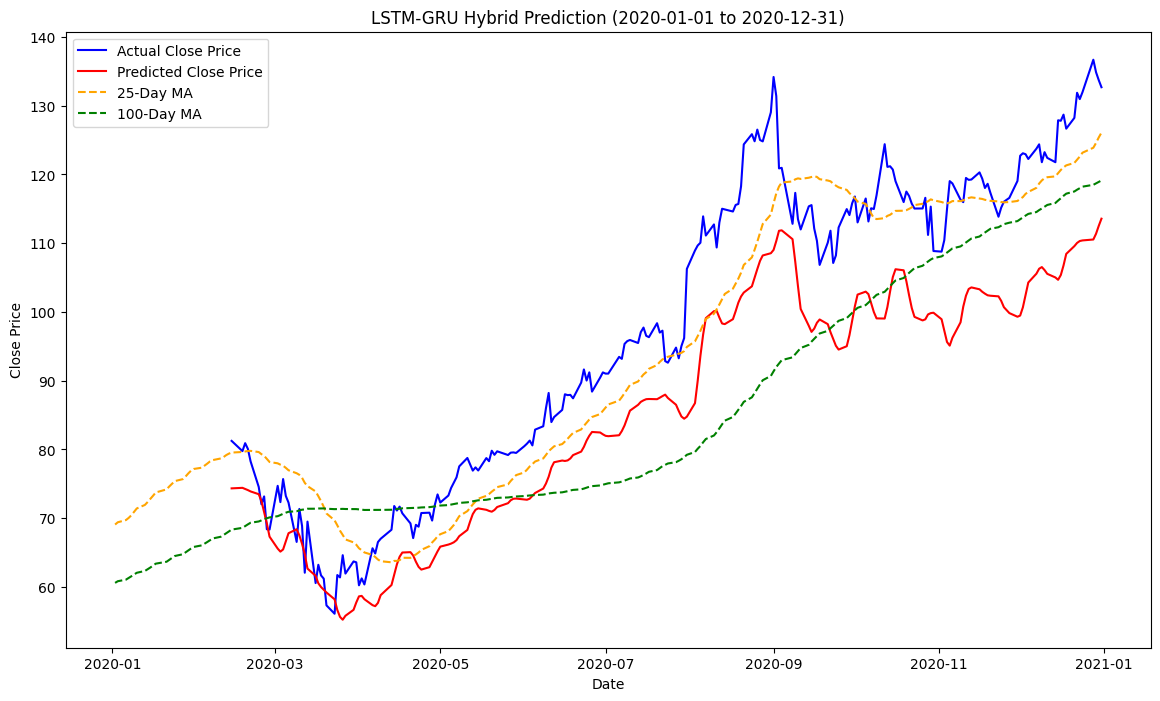

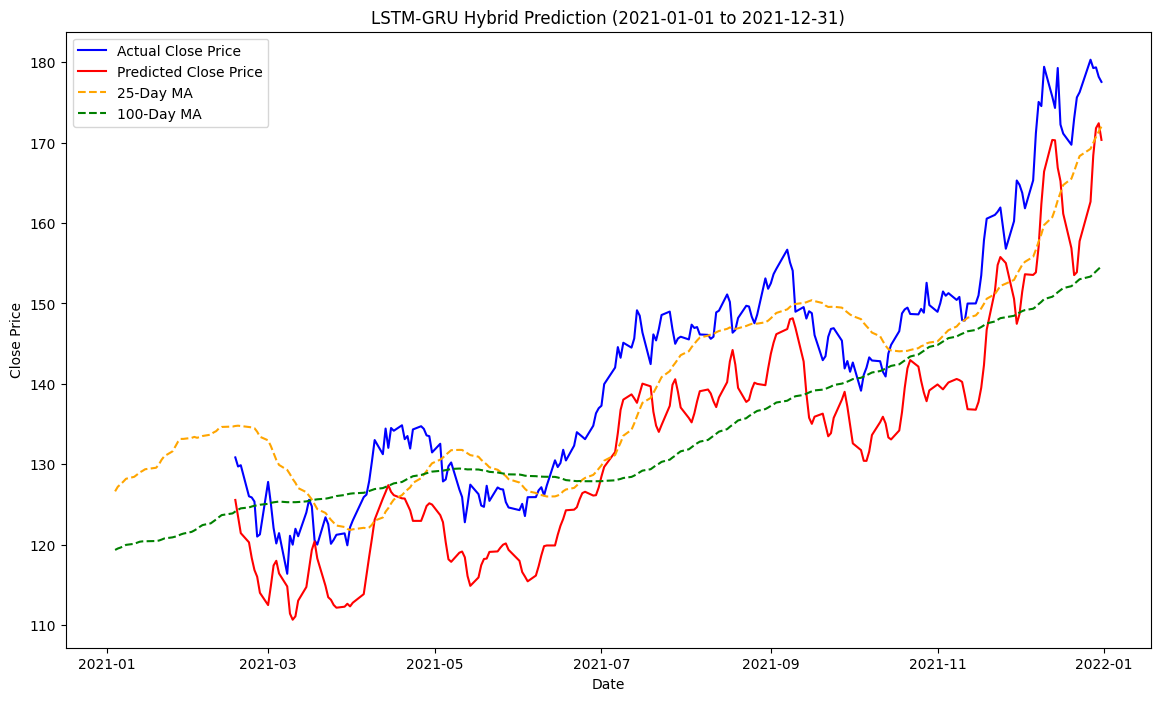

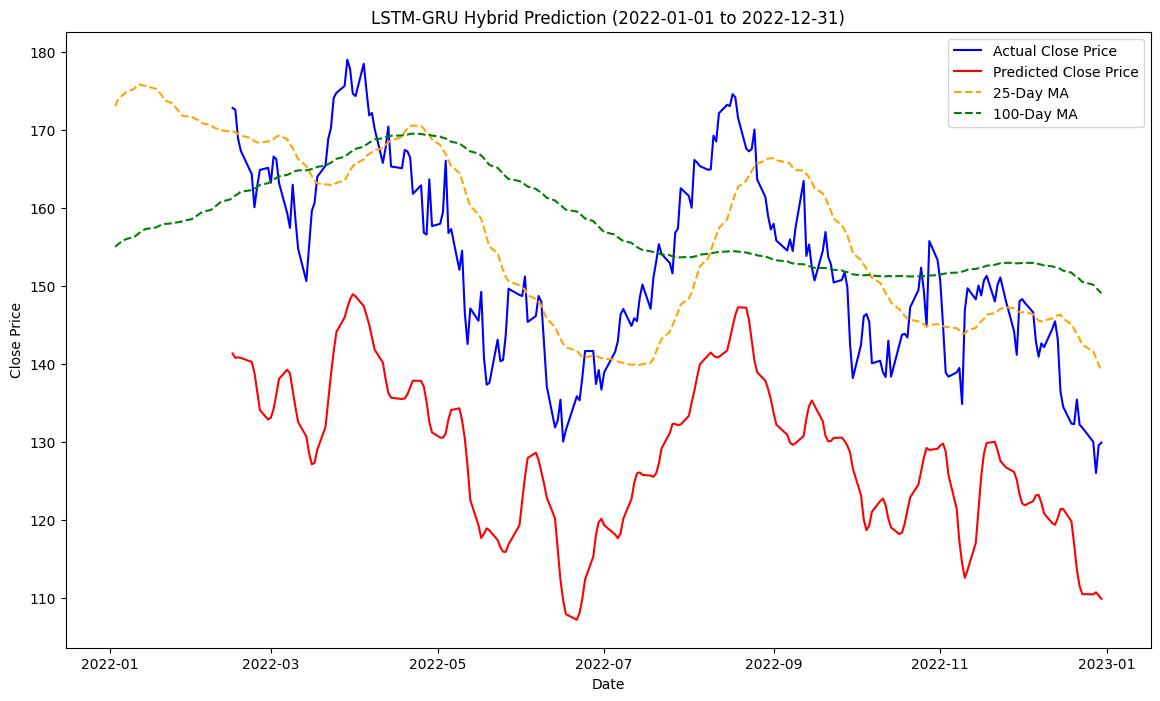

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

# Download Apple stock data
apple_df = yf.download('AAPL', start='2001-01-01', end='2024-01-01', interval='1d')

# Reset index and preprocess
apple_df.reset_index(inplace=True)
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace=True)
apple_df.sort_index(inplace=True)

# Focus on the 'Close' column and calculate moving averages
close_data = apple_df[['Close']]
close_data['MA25'] = close_data['Close'].rolling(window=25).mean()
close_data['MA100'] = close_data['Close'].rolling(window=100).mean()

# Normalize the data (Close, MA25, MA100)
scaler = MinMaxScaler()
close_data[['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']] = scaler.fit_transform(
    close_data[['Close', 'MA25', 'MA100']].fillna(0)
)

# Create sequences for LSTM-GRU
def create_sequence(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i - window_size:i].values)
        y.append(data.iloc[i, 0])  # Target: 'Close_Scaled' (first column)
    return np.array(X), np.array(y)

window_size = 30

# Define test periods
test_periods = [
    ("2001-01-01", "2019-12-31", "2020-01-01", "2020-12-31"),
    ("2001-01-01", "2020-12-31", "2021-01-01", "2021-12-31"),
    ("2001-01-01", "2021-12-31", "2022-01-01", "2022-12-31")
]

# Function to build a LSTM-GRU hybrid model with hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()

    # LSTM layer for feature extraction
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(window_size, 3)
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_lstm', min_value=0.1, max_value=0.5, step=0.1)))

    # GRU layers for sequential modeling
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units_1', min_value=32, max_value=128, step=16),
        return_sequences=True
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_gru_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(keras.layers.GRU(
        units=hp.Int('gru_units_2', min_value=32, max_value=128, step=16),
        return_sequences=False
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_gru_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense output layer
    model.add(keras.layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

results = []
figures = []

# Train and evaluate the LSTM-GRU hybrid model
for train_start, train_end, test_start, test_end in test_periods:
    print(f"\nTraining on {train_start} to {train_end}, testing on {test_start} to {test_end}")

    # Split data into train and test sets
    train_data = close_data.loc[train_start:train_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]
    test_data = close_data.loc[test_start:test_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]

    # Create sequences
    X_train, y_train = create_sequence(train_data, window_size)
    X_test, y_test = create_sequence(test_data, window_size)

    # Set up the Keras Tuner
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='lstm_gru_tuning',
        project_name=f'period_{test_start}_{test_end}'
    )

    # Perform hyperparameter search
    tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=16, verbose=1)

    # Retrieve the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

    print("\nBest Hyperparameters Found:")
    print(f"LSTM Units: {best_hp.get('lstm_units')}, GRU Units_1: {best_hp.get('gru_units_1')}, "
          f"GRU Units_2: {best_hp.get('gru_units_2')}, Dropout_LSTM: {best_hp.get('dropout_lstm')}, "
          f"Dropout_GRU_1: {best_hp.get('dropout_gru_1')}, Dropout_GRU_2: {best_hp.get('dropout_gru_2')}, "
          f"Learning Rate: {best_hp.get('learning_rate')}")

    # Train the best model
    best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

    # Make predictions
    predictions = best_model.predict(X_test)

    # Inverse transform predictions and actual values
    predictions_rescaled = scaler.inverse_transform(
        np.concatenate((predictions, np.zeros((len(predictions), 2))), axis=1)
    )[:, 0]
    y_test_rescaled = scaler.inverse_transform(
        np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 2))), axis=1)
    )[:, 0]

    # Evaluate the model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
    r2 = r2_score(y_test_rescaled, predictions_rescaled)
    print(f"Results for {test_start} to {test_end}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

    results.append({
        "Train Period": f"{train_start} to {train_end}",
        "Test Period": f"{test_start} to {test_end}",
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

    # Generate and store the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], y_test_rescaled, label="Actual Close Price", color="blue")
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], predictions_rescaled, label="Predicted Close Price", color="red")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA25'], label="25-Day MA", color="orange", linestyle="--")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA100'], label="100-Day MA", color="green", linestyle="--")
    ax.set_title(f"LSTM-GRU Hybrid Prediction ({test_start} to {test_end})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    ax.legend()
    figures.append(fig)

# Display summary results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


## Summary
The LSTM-GRU hybrid model predicts Apple’s daily stock closing prices using a sequence of 30 past data points (Close, MA25, MA100). It combines LSTM for capturing long-term dependencies and GRU for efficient sequential modeling, with dropout layers for regularization.

Keras Tuner optimizes hyperparameters like units, dropout rates, and learning rate. The model is trained on historical data (2001–2019) and tested on yearly periods (2020, 2021, 2022), evaluated using MSE, MAE, and R². Visualizations compare actual vs. predicted prices alongside moving averages.

This approach offers robust predictions, and moving averages enhance interpretability. Future improvements could include additional financial indicators or advanced architectures like transformers.

# LSTM - CNN - GRU
This model combines LSTM, CNN, and GRU layers to predict Apple's daily stock closing prices based on historical data and moving averages (MA25 and MA100). The hybrid architecture leverages:

LSTM: Captures long-term sequential dependencies in stock price movements.

CNN: Extracts spatial and temporal features using convolutional layers.

GRU: Models short-term sequential patterns efficiently.

Data Preparation:

Historical Apple stock data from 2001–2024 was collected.
Moving averages (25-day and 100-day) were calculated and normalized.
Data was split into training (e.g., 2001–2019) and testing periods (e.g., 2020, 2021, 2022).
A sliding window of 30 days was used to create input sequences.

Model Architecture:

LSTM Layer: Extracts long-term dependencies.

CNN Layer: Applies convolutional filters to capture important features.

GRU Layers: Further processes sequential data for robust prediction.

Dropout layers were included for regularization.

A dense output layer predicts the stock price.

Hyperparameter Tuning:

Optimized parameters like LSTM units, GRU units, CNN filters, kernel size, dropout rates, and learning rate using Keras Tuner.

Training and Testing:

The model was trained and validated using early years of data and tested on separate years (e.g., 2020, 2021, 2022).
Performance was evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.

Visualization:

Plots were generated to compare actual vs. predicted stock prices along with MA25 and MA100 for each test period.

Performance Metrics:

Metrics varied across test periods (2020, 2021, 2022), showing reasonable predictions with some variation in accuracy.

R² scores indicate how well the model captures stock price trends.

Best Hyperparameters:

Found optimal values for LSTM units, CNN filters, GRU units, and dropout rates, improving model performance.

Trial 10 Complete [00h 03m 45s]
val_loss: 0.012915857136249542

Best val_loss So Far: 0.00328733678907156
Total elapsed time: 00h 52m 51s

Best Hyperparameters Found:
LSTM Units: 48, Filters: 96, Kernel Size: 2, GRU Units_1: 96, GRU Units_2: 80, Learning Rate: 0.001
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 1.4352e-04 - val_loss: 0.0059
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 8.5279e-05 - val_loss: 0.0084
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 7.5902e-05 - val_loss: 0.0075
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 7.8510e-05 - val_loss: 0.0057
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 7.6285e-05 - val_loss: 0.0090
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 6.8829e-05 - val_loss: 0.0093
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 6.5784e-05 - val_loss: 0.0213
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 7.7018e-05 - val_loss: 0.0213
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 5.1741e-05 - val_loss: 0.0217
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 6.3535e-05 - val_loss: 0.0236
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 5.9973e-05 - val_loss: 0.024

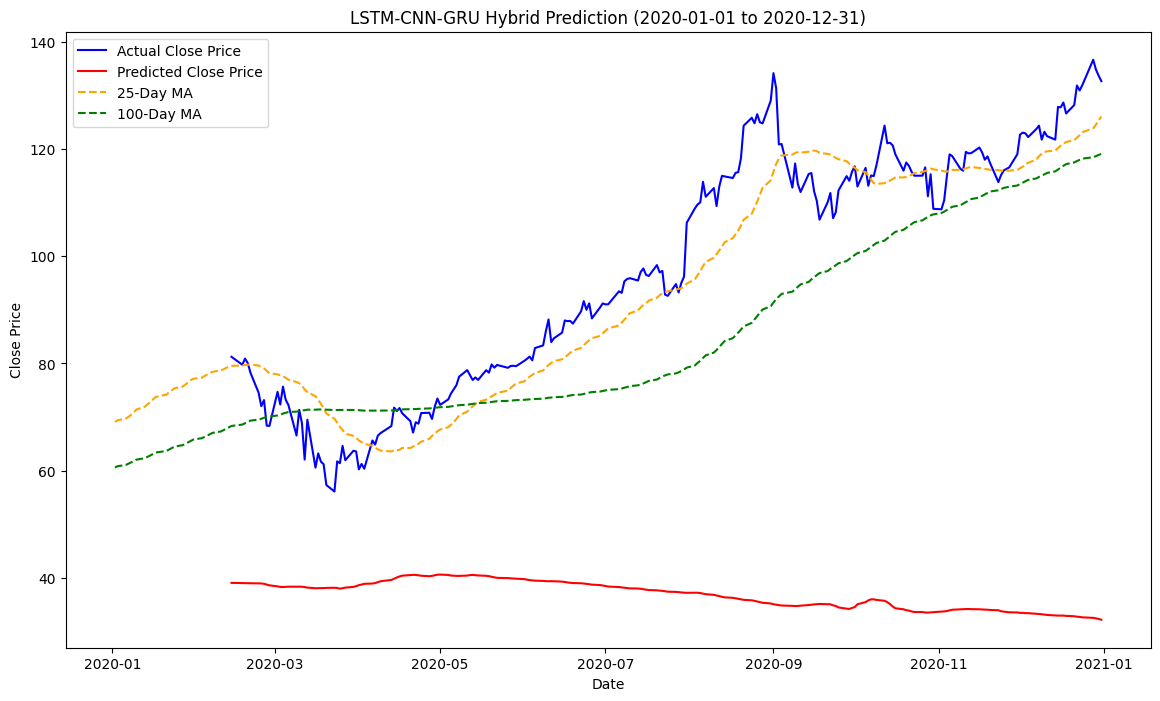

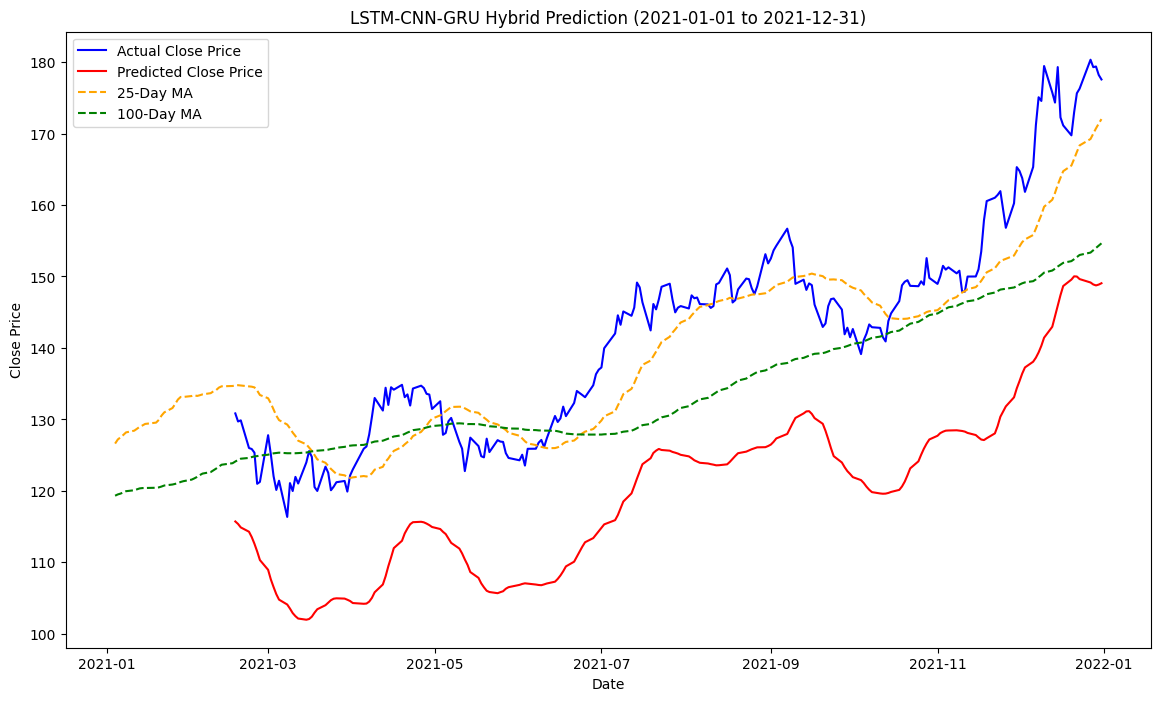

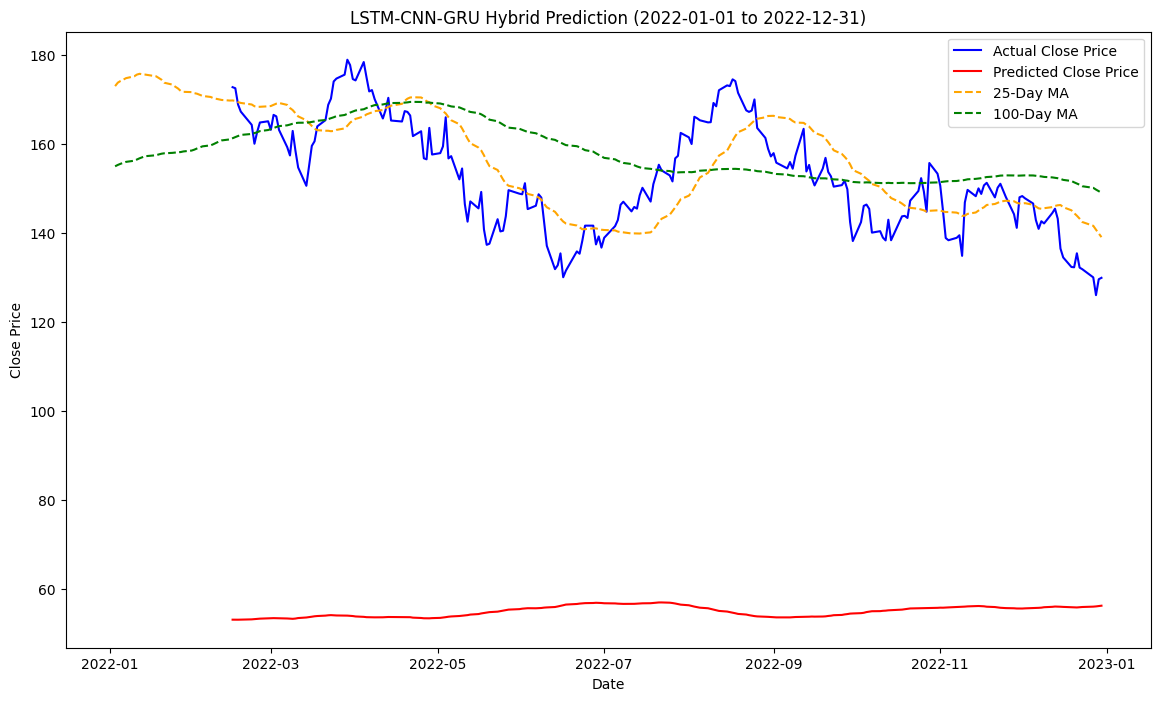

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

# Download Apple stock data
apple_df = yf.download('AAPL', start='2001-01-01', end='2024-01-01', interval='1d')

# Reset index and preprocess
apple_df.reset_index(inplace=True)
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df.set_index('Date', inplace=True)
apple_df.sort_index(inplace=True)

# Focus on the 'Close' column and calculate moving averages
close_data = apple_df[['Close']]
close_data['MA25'] = close_data['Close'].rolling(window=25).mean()
close_data['MA100'] = close_data['Close'].rolling(window=100).mean()

# Normalize the data (Close, MA25, MA100)
scaler = MinMaxScaler()
close_data[['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']] = scaler.fit_transform(
    close_data[['Close', 'MA25', 'MA100']].fillna(0)
)

# Create sequences for LSTM-CNN-GRU
def create_sequence(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i - window_size:i].values)
        y.append(data.iloc[i, 0])  # Target: 'Close_Scaled' (first column)
    return np.array(X), np.array(y)

window_size = 30

# Define test periods
test_periods = [
    ("2001-01-01", "2019-12-31", "2020-01-01", "2020-12-31"),
    ("2001-01-01", "2020-12-31", "2021-01-01", "2021-12-31"),
    ("2001-01-01", "2021-12-31", "2022-01-01", "2022-12-31")
]

# Function to build the LSTM-CNN-GRU hybrid model
def build_model(hp):
    model = keras.Sequential()

    # LSTM Layer for sequence processing
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(window_size, 3)
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_lstm', min_value=0.1, max_value=0.5, step=0.1)))

    # CNN Layer for feature extraction
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=16, max_value=128, step=16),
        kernel_size=hp.Int('kernel_size', min_value=2, max_value=5),
        activation='relu'
    ))
    model.add(keras.layers.MaxPooling1D(pool_size=2))
    model.add(keras.layers.Dropout(hp.Float('dropout_cnn', min_value=0.1, max_value=0.5, step=0.1)))

    # GRU Layers for further sequential processing
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units_1', min_value=32, max_value=128, step=16),
        return_sequences=True
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_gru_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(keras.layers.GRU(
        units=hp.Int('gru_units_2', min_value=32, max_value=128, step=16),
        return_sequences=False
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_gru_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense output layer
    model.add(keras.layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

results = []
figures = []

# Train and evaluate the LSTM-CNN-GRU hybrid model
for train_start, train_end, test_start, test_end in test_periods:
    print(f"\nTraining on {train_start} to {train_end}, testing on {test_start} to {test_end}")

    # Split data into train and test sets
    train_data = close_data.loc[train_start:train_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]
    test_data = close_data.loc[test_start:test_end, ['Close_Scaled', 'MA25_Scaled', 'MA100_Scaled']]

    # Create sequences
    X_train, y_train = create_sequence(train_data, window_size)
    X_test, y_test = create_sequence(test_data, window_size)

    # Set up the Keras Tuner
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='lstm_cnn_gru_tuning',
        project_name=f'period_{test_start}_{test_end}'
    )

    # Perform hyperparameter search
    tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=16, verbose=1)

    # Retrieve the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

    print("\nBest Hyperparameters Found:")
    print(f"LSTM Units: {best_hp.get('lstm_units')}, Filters: {best_hp.get('filters')}, "
          f"Kernel Size: {best_hp.get('kernel_size')}, GRU Units_1: {best_hp.get('gru_units_1')}, "
          f"GRU Units_2: {best_hp.get('gru_units_2')}, Learning Rate: {best_hp.get('learning_rate')}")

    # Train the best model
    best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

    # Make predictions
    predictions = best_model.predict(X_test)

    # Inverse transform predictions and actual values
    predictions_rescaled = scaler.inverse_transform(
        np.concatenate((predictions, np.zeros((len(predictions), 2))), axis=1)
    )[:, 0]
    y_test_rescaled = scaler.inverse_transform(
        np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 2))), axis=1)
    )[:, 0]

    # Evaluate the model
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
    r2 = r2_score(y_test_rescaled, predictions_rescaled)
    print(f"Results for {test_start} to {test_end}: MSE={mse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

    results.append({
        "Train Period": f"{train_start} to {train_end}",
        "Test Period": f"{test_start} to {test_end}",
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

    # Generate and store the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], y_test_rescaled, label="Actual Close Price", color="blue")
    ax.plot(close_data.loc[test_start:test_end].index[window_size:], predictions_rescaled, label="Predicted Close Price", color="red")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA25'], label="25-Day MA", color="orange", linestyle="--")
    ax.plot(close_data.loc[test_start:test_end].index, close_data.loc[test_start:test_end]['MA100'], label="100-Day MA", color="green", linestyle="--")
    ax.set_title(f"LSTM-CNN-GRU Hybrid Prediction ({test_start} to {test_end})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    ax.legend()
    figures.append(fig)

# Display summary results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


## Summary
This code implements a hybrid LSTM-CNN-GRU model to predict Apple stock prices. It downloads and preprocesses the data, scaling the 'Close' prices and moving averages. The model combines LSTM for sequence processing, CNN for feature extraction, and GRU for sequential learning. Hyperparameters are optimized using Keras Tuner’s Random Search. The model is trained on different test periods, and its performance is evaluated using MSE, MAE, and R² scores. Predictions are compared with actual prices, and visual plots are generated. Results for each test period are summarized in a table.